**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


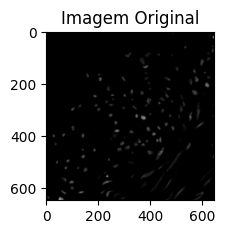

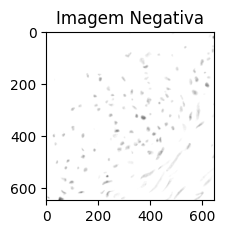

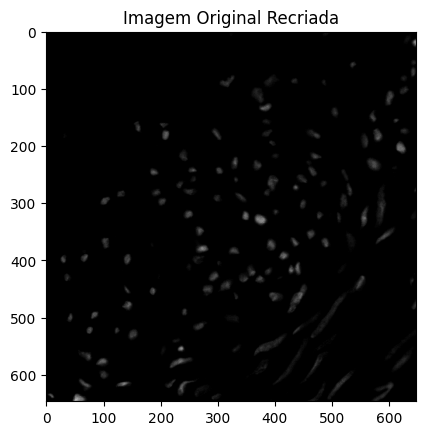

A imagem Negativa apresenta melhor visualizacao, pois na imagem original alguns pixels cinza escuro comecam a se misturar com o fundo preto.


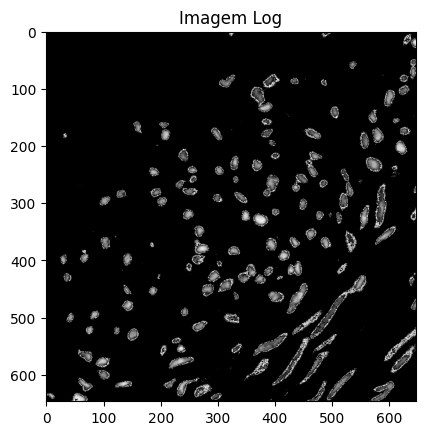

In [89]:
# code here
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_original = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)

plt.subplot(2, 2, 1)
plt.imshow(img_original, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.show()

img_negativa = (255 - img_original)
img_original = (255 - img_negativa)

plt.subplot(2, 2, 2)
plt.imshow(img_negativa, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Negativa")
plt.show()

plt.imshow(img_original, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original Recriada")
plt.show()

print("A imagem Negativa apresenta melhor visualizacao, pois na imagem original alguns pixels cinza escuro comecam a se misturar com o fundo preto.")

c = 255 / np.log(1 + np.max(img_original))
img_logaritmica = 100 * (np.log(img_original + 1))

log_image = np.array(img_logaritmica, dtype = np.uint8)

plt.imshow(log_image, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Log")
plt.show()

In [ ]:
'''
Equalizar uma imagem - Ajustar a distribuicao de intensidade de pixel para ter uma imagem mais uniforme e com contrastes melhores
Equalizar - indica a probabilidade acumulada de que um pixel na imagem tenha uma intensidade menor ou igual a um determinado valor x. Calculada através do histograma
img original -> histograma -> imagem equalizada

https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html
https://lazymodellingcrew.com/post/post_10_intro-to-histogram_ta/
https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/
'''

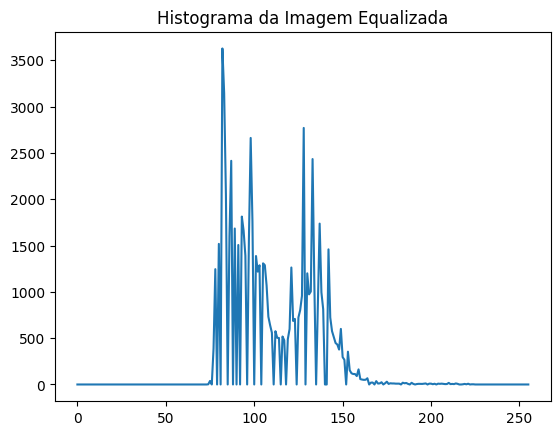

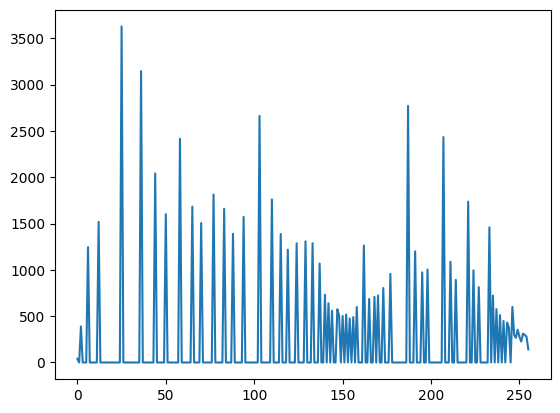

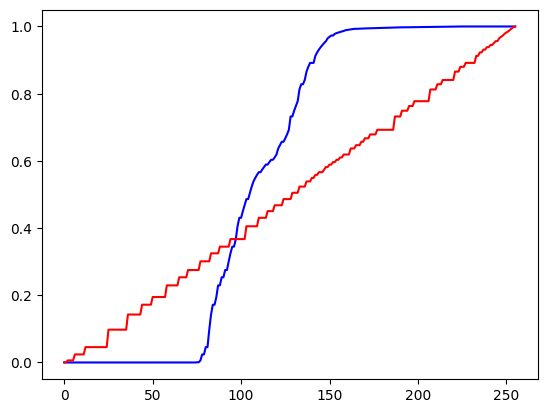

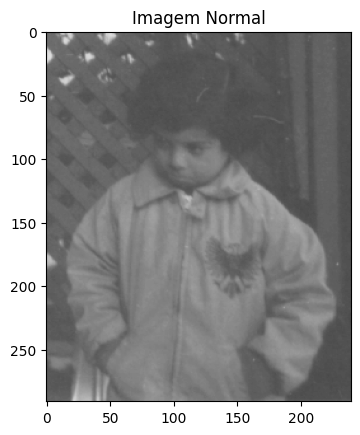

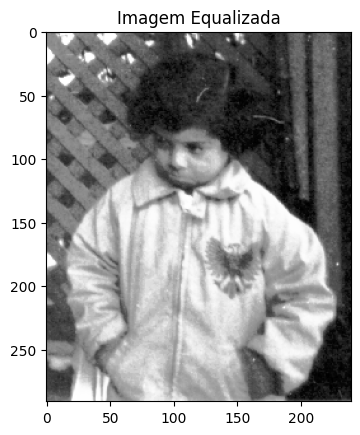

In [85]:
# code here
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Carrega a imagem
#img = cv2.imread('pout.tif', 0)
img_original = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)

# Mostra o histograma da imagem original
# Syntax: cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
histograma_img_original = cv2.calcHist([img_original],[0],None,[256],[0,256])
plt.title('Histograma da imagem pout.tif')
plt.figure(1)
plt.plot(histograma_img_original)

# Equaliza a imagem
img_equalizada = cv2.equalizeHist(img_original)

# Mostra o histograma da imagem equalizada
histograma_img_equalizada = cv2.calcHist([img_equalizada],[0],None,[256],[0,256])
plt.title('Histograma da Imagem Equalizada')
plt.figure(2)
plt.plot(histograma_img_equalizada)

# cumsum() faz a soma cumulativa do histograma
# A divisao pela soma normaliza para que os valores sejam entre 0 e 1
# distribuição acumulada calcula a probabilidade acumulada para um determinado valor x
distri_acumulada_img_original = histograma_img_original.cumsum() / histograma_img_original.sum()
distri_acumulada_img_equalizada = histograma_img_equalizada.cumsum() / histograma_img_equalizada.sum()

plt.figure(3)
plt.plot(distri_acumulada_img_original, color='b')
plt.plot(distri_acumulada_img_equalizada, color='r')

plt.figure(4)
plt.imshow(img_original, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Normal")
plt.show()

plt.figure(5)
plt.imshow(img_equalizada, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Equalizada")
plt.show()

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

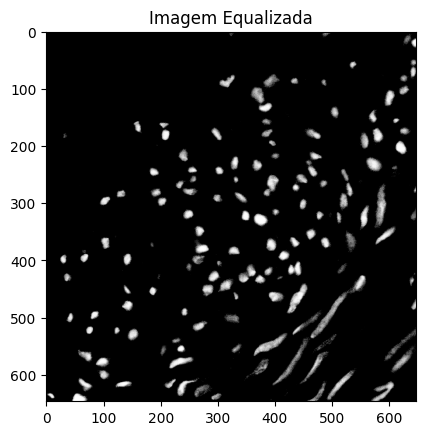

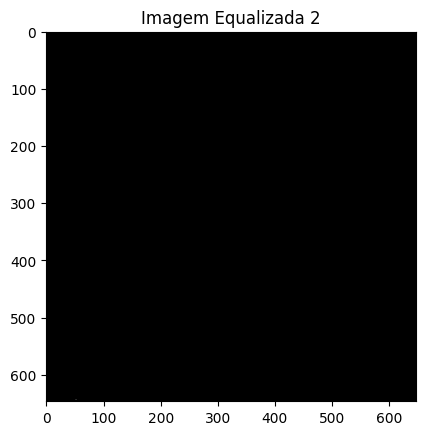

1.0
0.9039653
1.0
0.9999976


In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

img_original = cv2.imread('im_cells.png', cv2.IMREAD_GRAYSCALE)

# histograma
histograma_img_original = cv2.calcHist([img_original],[0],None,[256],[0,256])

distri_acumulada_img_original =  histograma_img_original.cumsum() / histograma_img_original.sum()
#print(type(cdf))
# Mapear as intensidades da imagem original para as intensidades da nova distribuição
img_equalizada = distri_acumulada_img_original[img_original]

plt.figure(6)
plt.imshow(img_equalizada, cmap='gray')
plt.title("Imagem Equalizada")
plt.show()

histograma_img_equalizada = cv2.calcHist([img_equalizada],[0],None,[256],[0,256])
distri_acumulada_img_equalizada =  histograma_img_equalizada.cumsum() / histograma_img_equalizada.sum()
img_equalizada_2 = distri_acumulada_img_equalizada[img_equalizada.astype('uint8')]

plt.figure(8)
plt.imshow(img_equalizada_2, cmap='gray')
plt.title("Imagem Equalizada 2")
plt.show()


print(np.amax(img_equalizada))
print(np.amin(img_equalizada))
print(np.amax(img_equalizada_2))
print(np.amin(img_equalizada_2))